# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings



In [17]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [21]:
# Try loading one file

df = pd.read_parquet('C:/Users/Dell/Desktop/2023-1.parquet')
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [157]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os
import pandas as pd

# Select the folder having data files
os.chdir(r'C:\Users\Dell\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\trip_records')

# Only list .parquet files
file_list = [file for file in os.listdir() if file.endswith('.parquet')]

# initialise an empty dataframe
df = pd.DataFrame()

# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_month = pd.read_parquet(file_path)
        print(f"File: {file_name}, Rows: {len(df_month)}")

        # Ensure datetime type
        df_month['tpep_pickup_datetime'] = pd.to_datetime(df_month['tpep_pickup_datetime'])
        dates = df_month['tpep_pickup_datetime'].dt.date.unique()

        sampled_month = pd.DataFrame()

        for date in dates:
            date_df = df_month[df_month['tpep_pickup_datetime'].dt.date == date]
            sampled_date = pd.DataFrame()

            for hour in range(24):
                hour_df = date_df[date_df['tpep_pickup_datetime'].dt.hour == hour]

                if not hour_df.empty:
                    hour_sample = hour_df.sample(frac=0.05, random_state=42)
                    sampled_date = pd.concat([sampled_date, hour_sample], ignore_index=True)

            sampled_month = pd.concat([sampled_month, sampled_date], ignore_index=True)

        df = pd.concat([df, sampled_month], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

print(f"\n Final combined sampled DataFrame: {len(df)} rows")



File: 2023-1.parquet, Rows: 3041714
File: 2023-10.parquet, Rows: 3485185
File: 2023-11.parquet, Rows: 3302857
File: 2023-12.parquet, Rows: 3333925
File: 2023-2.parquet, Rows: 3374086
File: 2023-3.parquet, Rows: 3275796
File: 2023-4.parquet, Rows: 2792901
File: 2023-5.parquet, Rows: 2889185
File: 2023-6.parquet, Rows: 3258261
File: 2023-7.parquet, Rows: 3481547
File: 2023-8.parquet, Rows: 2875947
File: 2023-9.parquet, Rows: 2817156

 Final combined sampled DataFrame: 1896400 rows


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [159]:
# Store the df in csv/parquet
df_sampled = df.sample(n=300000, random_state=42) if len(df) > 300000 else df
print("Final shape:", df_sampled.shape)
df_sampled.to_csv('sampled_nyc_taxi.csv', index=False)
print("Saved as CSV: sampled_nyc_taxi.csv")

Final shape: (300000, 20)
Saved as CSV: sampled_nyc_taxi.csv


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [177]:
# Load the new data file

df = pd.read_csv('sampled_nyc_taxi.csv')


Unique Vendor IDs: [2 1 6]


In [163]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0   
1         2  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0   
2         2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0   
3         2  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0   
4         2  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.56         1.0                  N            24           141   
1           0.90         1.0                  N           186           170   
2          21.09         2.0                  N           132           151   
3           2.57         1.0                  N           186           239   
4           1.74         1.0                  N           142           237   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5        5.50          0.00   
1             2         10.0    0.0      0.5        0.00          0.00   
2             1         70.0    0.0      0.5       10.00          6.55   
3             1         23.3    0.0      0.5        5.46          0.00   
4             1         11.4    2.5      0.5        3.58          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         27.50                   2.5          NaN   
1                    1.0         14.00                   2.5          0.0   
2                    1.0         89.30                   0.0          NaN   
3                    1.0         32.76                   2.5          NaN   
4                    1.0         21.48                   2.5          NaN   

   Airport_fee  
0         0.00  
1          NaN  
2         1.25  
3         0.00  
4         0.00

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289777 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289777 non-null  float64
 6   store_and_fwd_flag     289777 non-null  object 
 7   PULocationID           300000 non-null  int64  
 8   DOLocationID           300000 non-null  int64  
 9   payment_type           300000 non-null  int64  
 10  fare_amount            300000 non-null  float64
 11  extra                  300000 non-null  float64
 12  mta_tax                300000 non-null  float64
 13  tip_amount             300000 non-null  float64
 14  tolls_amount           300000 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [167]:
# Fix the index and drop any columns that are not needed
df = df.reset_index(drop=True)
df = df.drop(columns=['store_and_fwd_flag'], errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289777 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289777 non-null  float64
 6   PULocationID           300000 non-null  int64  
 7   DOLocationID           300000 non-null  int64  
 8   payment_type           300000 non-null  int64  
 9   fare_amount            300000 non-null  float64
 10  extra                  300000 non-null  float64
 11  mta_tax                300000 non-null  float64
 12  tip_amount             300000 non-null  float64
 13  tolls_amount           300000 non-null  float64
 14  improvement_surcharge  300000 non-nu

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [169]:
# Combine the two airport fee columns
if 'Airport_fee' in df.columns:
    df['airport_fee'] = df[['airport_fee', 'Airport_fee']].sum(axis=1)
    df = df.drop(columns=['Airport_fee'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               300000 non-null  int64  
 1   tpep_pickup_datetime   300000 non-null  object 
 2   tpep_dropoff_datetime  300000 non-null  object 
 3   passenger_count        289777 non-null  float64
 4   trip_distance          300000 non-null  float64
 5   RatecodeID             289777 non-null  float64
 6   PULocationID           300000 non-null  int64  
 7   DOLocationID           300000 non-null  int64  
 8   payment_type           300000 non-null  int64  
 9   fare_amount            300000 non-null  float64
 10  extra                  300000 non-null  float64
 11  mta_tax                300000 non-null  float64
 12  tip_amount             300000 non-null  float64
 13  tolls_amount           300000 non-null  float64
 14  improvement_surcharge  300000 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [171]:
# check where values of fare amount are negative
negative_fares = df[df['fare_amount'] < 0]
print(negative_fares)
print(f"Number of negative fares: {len(negative_fares)}")

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []
Number of negative fares: 0


Did you notice something different in the `RatecodeID` column for above records?

In [39]:
# Analyse RatecodeID for the negative fare amounts
print(negative_fares['RatecodeID'].value_counts())
print(negative_fares[['fare_amount', 'trip_distance', 'PULocationID', 'DOLocationID']].head())

Series([], Name: count, dtype: int64)
Empty DataFrame
Columns: [fare_amount, trip_distance, PULocationID, DOLocationID]
Index: []


In [44]:
# Find which columns have negative values
numeric_cols = df.select_dtypes(include=['number']).columns
neg_cols = [col for col in numeric_cols if (df[col] < 0).any()]

print("Columns with negative values:", neg_cols)

Columns with negative values: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [41]:
# fix these negative values

cols_to_fix = ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in cols_to_fix:
    df[col] = df[col].abs()
print("Fixed negative values in:", cols_to_fix)

for col in cols_to_fix:
    print(f"{col}: {(df[col] < 0).sum()} negative values remaining")

Fixed negative values in: ['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']
mta_tax: 0 negative values remaining
improvement_surcharge: 0 negative values remaining
total_amount: 0 negative values remaining
congestion_surcharge: 0 negative values remaining
airport_fee: 0 negative values remaining


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [43]:
# Find the proportion of missing values in each column

missing_proportion = df.isnull().sum() / len(df)
print(missing_proportion.sort_values(ascending=False))
missing_cols = missing_proportion[missing_proportion > 0]

print('Coulmns having missing values ------')
print(missing_cols)


passenger_count          0.034077
congestion_surcharge     0.034077
RatecodeID               0.034077
tpep_pickup_datetime     0.000000
mta_tax                  0.000000
total_amount             0.000000
improvement_surcharge    0.000000
tolls_amount             0.000000
tip_amount               0.000000
fare_amount              0.000000
extra                    0.000000
tpep_dropoff_datetime    0.000000
payment_type             0.000000
DOLocationID             0.000000
PULocationID             0.000000
trip_distance            0.000000
airport_fee              0.000000
dtype: float64
Coulmns having missing values ------
passenger_count         0.034077
RatecodeID              0.034077
congestion_surcharge    0.034077
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [45]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

median_value = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_value)

print(f"Filled NaN with median: {median_value}")
median_value = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_value)

print(f"Filled NaN with median: {median_value}")
df.loc[df['passenger_count'] == 0, 'passenger_count'] = median_value

print("Replaced zero passenger counts with median.")
print(df['passenger_count'].describe())
print(df['passenger_count'].isnull().sum())

Filled NaN with median: 1.0
Filled NaN with median: 1.0
Replaced zero passenger counts with median.
count    300000.000000
mean          1.373130
std           0.865351
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: passenger_count, dtype: float64
0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [47]:
# Fix missing values in 'RatecodeID'
ratecode_mode = df['RatecodeID'].mode()[0]
df['RatecodeID'] = df['RatecodeID'].fillna(ratecode_mode)

print(f"Filled missing RatecodeID with mode: {ratecode_mode}")
print(df['RatecodeID'].isnull().sum())

Filled missing RatecodeID with mode: 1.0
0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [49]:
# handle null values in congestion_surcharge

missing_count = df['congestion_surcharge'].isnull().sum()
print(f"Missing values in congestion_surcharge: {missing_count}")
mode_surcharge = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_surcharge)
print(f"Filled NaN in congestion_surcharge with mode: {mode_surcharge}")
print(df['congestion_surcharge'].isnull().sum())


Missing values in congestion_surcharge: 10223
Filled NaN in congestion_surcharge with mode: 2.5
0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [51]:
# Handle any remaining missing values

missing = df.isnull().sum()
missing = missing[missing > 0]

print("Columns with remaining missing values:")
print(missing)
print("\n✅ Final missing check:")
print(df.isnull().sum().sort_values(ascending=False))



Columns with remaining missing values:
Series([], dtype: int64)

✅ Final missing check:
tpep_pickup_datetime     0
extra                    0
congestion_surcharge     0
total_amount             0
improvement_surcharge    0
tolls_amount             0
tip_amount               0
mta_tax                  0
fare_amount              0
tpep_dropoff_datetime    0
payment_type             0
DOLocationID             0
PULocationID             0
RatecodeID               0
trip_distance            0
passenger_count          0
airport_fee              0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [53]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print(df.describe())

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.373130       3.727158       1.621313     165.224560   
std           0.865351      69.115820       7.320134      64.135085   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.040000       1.000000     132.000000   
50%           1.000000       1.790000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000   22910.920000      99.000000     265.000000   

        DOLocationID   payment_type    fare_amount          extra  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean      164.124293       1.164370      19.825403       1.584635   
std        69.813086       0.507234      18.361023       1.828806   
min         1.000000       0.000000       0.000000       0.000000   
25%       114.0

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [55]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]

In [181]:
# Continue with outlier handling

print("Unique Vendor IDs before:", df['VendorID'].unique())
df_clean = df[df['VendorID'].isin([1, 2])].copy()

df = df[df['trip_distance'] < 250]
df = df[~((df['fare_amount'] == 0) & (df['trip_distance'] > 0))]
df = df[df['RatecodeID'].isin([1, 2, 3, 4, 5, 6])]
df = df[df['payment_type'].isin([1, 2, 3, 4, 5, 6])]
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~(
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
)]
print("Final shape after outlier removal:", df.shape)


Unique Vendor IDs before: [2 1]
Unique Vendor IDs after cleaning: [2 1]
Final shape after outlier removal: (288025, 20)


In [59]:
# Do any columns need standardising?

print(df.describe())
df.info()

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    288024.000000  288024.000000  288024.000000  288024.000000   
mean          1.388568       3.422610       1.074754     165.603526   
std           0.879626       4.533721       0.393735      63.684798   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.780000       1.000000     162.000000   
75%           1.000000       3.340000       1.000000     234.000000   
max           6.000000     172.710000       6.000000     265.000000   

        DOLocationID   payment_type    fare_amount          extra  \
count  288024.000000  288024.000000  288024.000000  288024.000000   
mean      164.637662       1.206295      19.648255       1.644349   
std        69.658330       0.466054      18.242271       1.836348   
min         1.000000       1.000000       0.000000       0.000000   
25%       114.0

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [203]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'Airport_fee',
 'pickup_hour',
 'pickup_day']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical Variables
* `tpep_pickup_datetime`:Categorical Variables
* `tpep_dropoff_datetime`:Categorical Variables
* `passenger_count`:Categorical Variables
* `trip_distance`:
* `RatecodeID`:Categorical Variables
* `PULocationID`:Categorical Variables
* `DOLocationID`:Categorical Variables
* `payment_type`:Categorical Variables
* `pickup_hour`:Categorical Variables
* `trip_duration`:Categorical Variables


The following monetary parameters belong in the same category, is it categorical or numerical?

All these are numerical
* `fare_amount` 
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

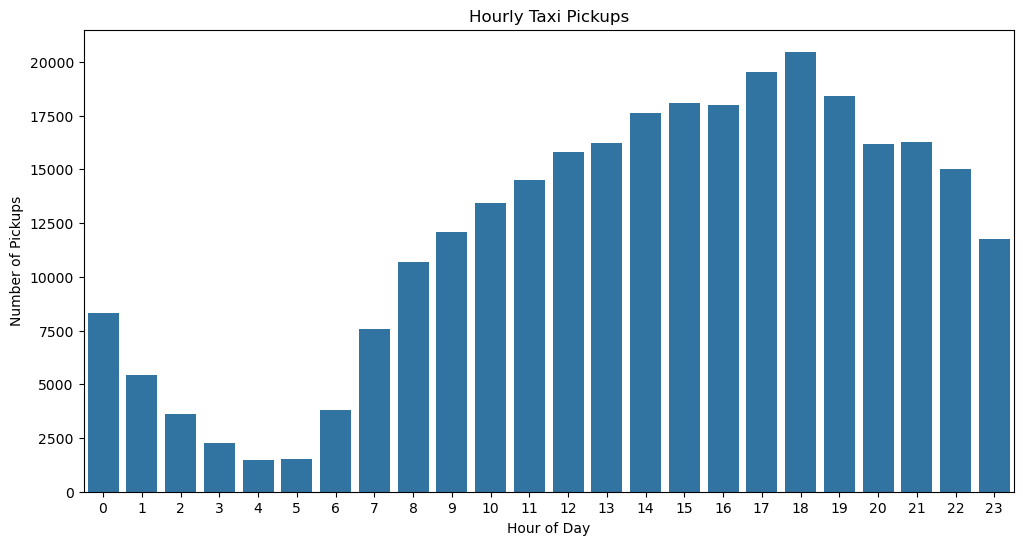

In [63]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour

plt.figure(figsize=(12,6))
sns.countplot(x='pickup_hour', data=df)
plt.title('Hourly Taxi Pickups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Pickups')
plt.show()


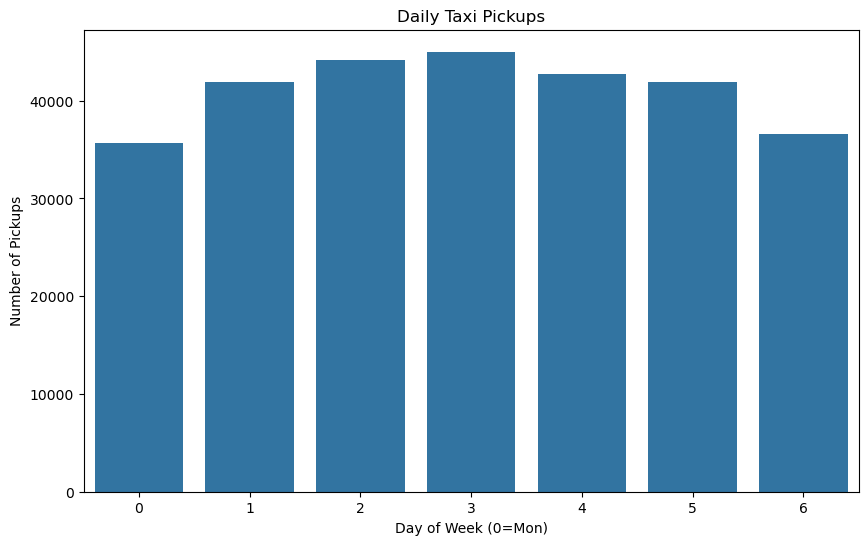

In [65]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.dayofweek

plt.figure(figsize=(10,6))
sns.countplot(x='pickup_day', data=df)
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of Week (0=Mon)')
plt.ylabel('Number of Pickups')
plt.show()

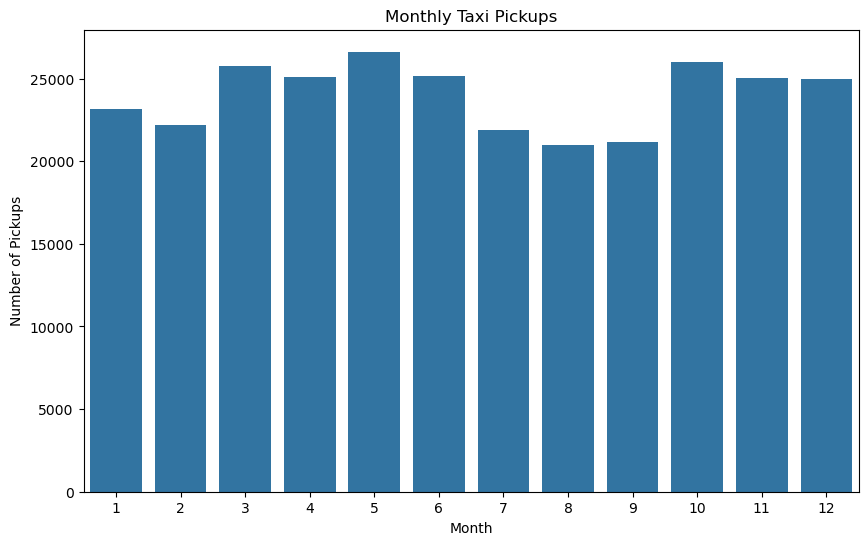

In [67]:
# Show the monthly trends in pickups

df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month

plt.figure(figsize=(10,6))
sns.countplot(x='pickup_month', data=df)
plt.title('Monthly Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [69]:
# Analyse the above parameters
#Checking for minimum values
print("Minimum values:")
print("fare_amount:", df['fare_amount'].min())
print("tip_amount:", df['tip_amount'].min())
print("total_amount:", df['total_amount'].min())
print("trip_distance:", df['trip_distance'].min())
#Count for 0 value rows
print("\nRows with zero fare_amount:", (df['fare_amount'] == 0).sum())
print("Rows with zero tip_amount:", (df['tip_amount'] == 0).sum())
print("Rows with zero total_amount:", (df['total_amount'] == 0).sum())
print("Rows with zero trip_distance:", (df['trip_distance'] == 0).sum())
#Count with Negative values
print("\nRows with negative fare_amount:", (df['fare_amount'] < 0).sum())
print("Rows with negative tip_amount:", (df['tip_amount'] < 0).sum())
print("Rows with negative total_amount:", (df['total_amount'] < 0).sum())
print("Rows with negative trip_distance:", (df['trip_distance'] < 0).sum())
zero_fare = df[df['fare_amount'] == 0]
print("\nSample rows with fare_amount = 0:")
print(zero_fare[['fare_amount', 'trip_distance', 'PULocationID', 'DOLocationID']].head())

Minimum values:
fare_amount: 0.0
tip_amount: 0.0
total_amount: 0.0
trip_distance: 0.0

Rows with zero fare_amount: 41
Rows with zero tip_amount: 63426
Rows with zero total_amount: 28
Rows with zero trip_distance: 3381

Rows with negative fare_amount: 0
Rows with negative tip_amount: 0
Rows with negative total_amount: 0
Rows with negative trip_distance: 0

Sample rows with fare_amount = 0:
       fare_amount  trip_distance  PULocationID  DOLocationID
3983           0.0            0.0           186           186
4657           0.0            0.0           145           145
12036          0.0            0.0           132           132
14785          0.0            0.0             7             7
24682          0.0            0.0           264           264


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [71]:
# Create a df with non zero entries for the selected parameters.
non_zero_df = df[
    (df['trip_distance'] > 0) &
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0)
].copy()


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

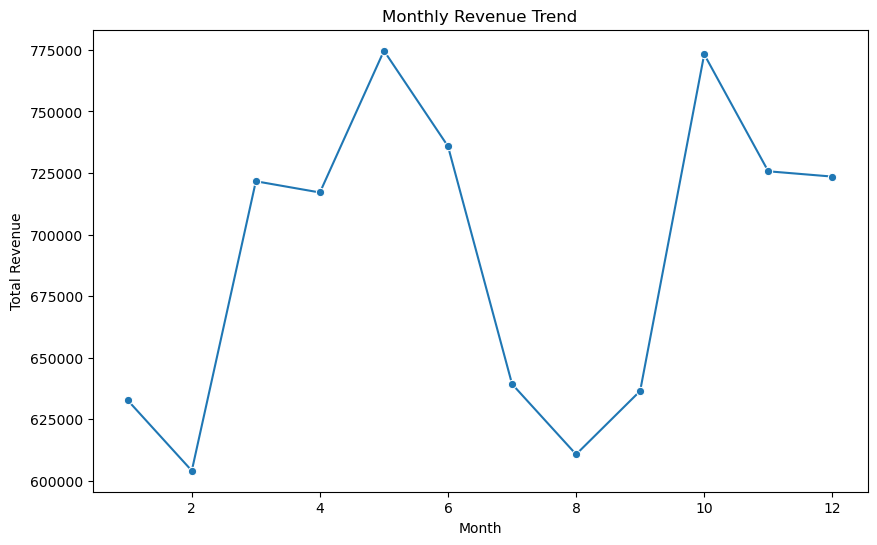

In [73]:
# Group data by month and analyse monthly revenue

monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(x='pickup_month', y='total_amount', data=monthly_revenue, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

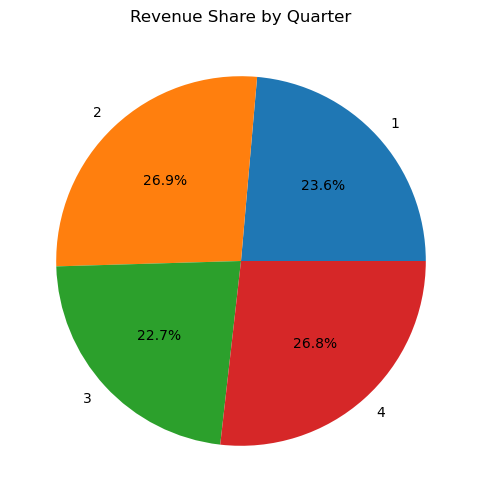

In [75]:
# Calculate proportion of each quarter



df['quarter'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = df.groupby('quarter')['total_amount'].sum()

quarterly_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))
plt.title('Revenue Share by Quarter')
plt.ylabel('')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

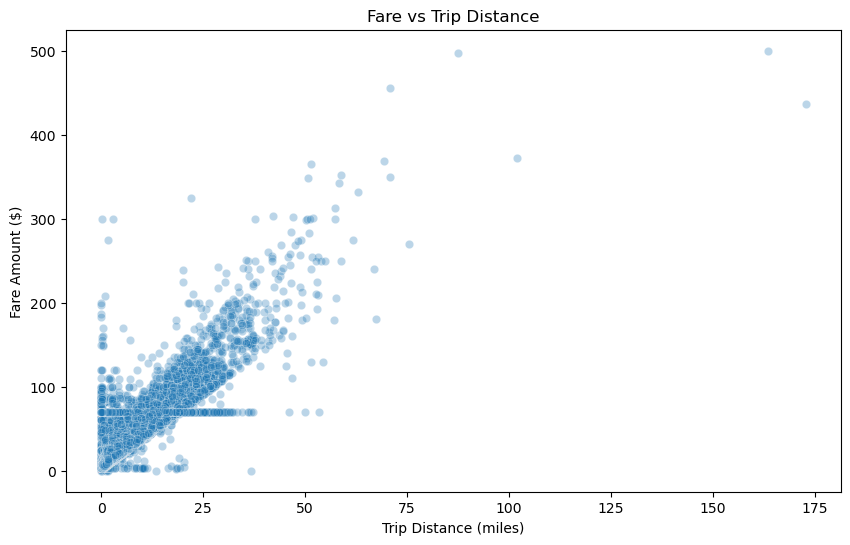

Correlation between trip_distance and fare_amount: 0.95


In [207]:
# Show how trip fare is affected by distance
non_zero_df = df[df['trip_distance'] > 0]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=non_zero_df, alpha=0.3)
plt.title('Fare vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Correlation between trip_distance and fare_amount
corr = non_zero_df['trip_distance'].corr(non_zero_df['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {corr:.2f}")

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

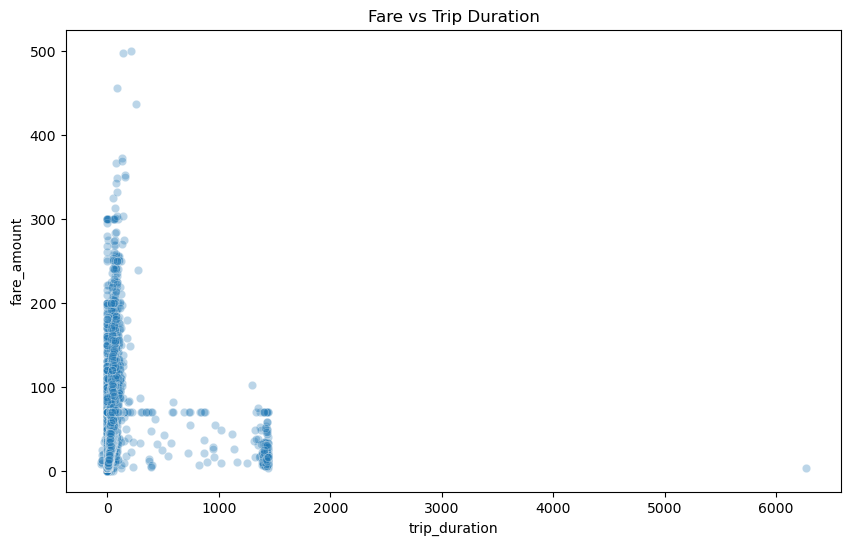

Corr: 0.25934112633241696


In [211]:
# Show relationship between fare and trip duration
df['trip_duration'] = (
    pd.to_datetime(df['tpep_dropoff_datetime']) - pd.to_datetime(df['tpep_pickup_datetime'])
).dt.total_seconds() / 60  # in minutes
plt.figure(figsize=(10,6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=df, alpha=0.3)
plt.title('Fare vs Trip Duration')
plt.show()

print('Corr:', df['fare_amount'].corr(df['trip_duration']))


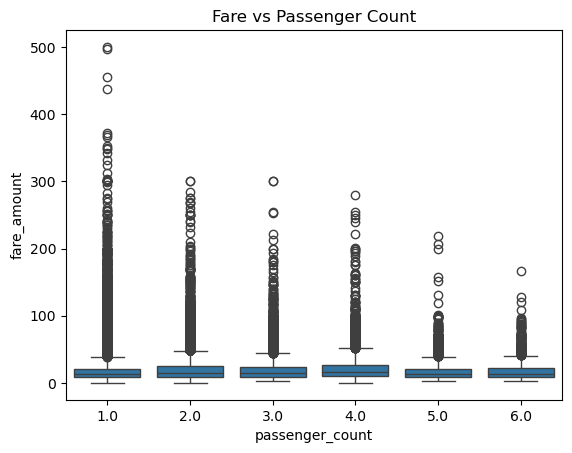

In [81]:
# Show relationship between fare and number of passengers

sns.boxplot(x='passenger_count', y='fare_amount', data=df)
plt.title('Fare vs Passenger Count')
plt.show()


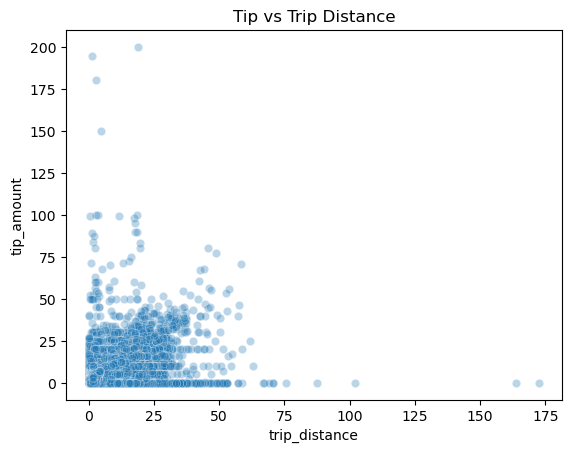

In [83]:
# Show relationship between tip and trip distance

sns.scatterplot(x='trip_distance', y='tip_amount', data=non_zero_df, alpha=0.3)
plt.title('Tip vs Trip Distance')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

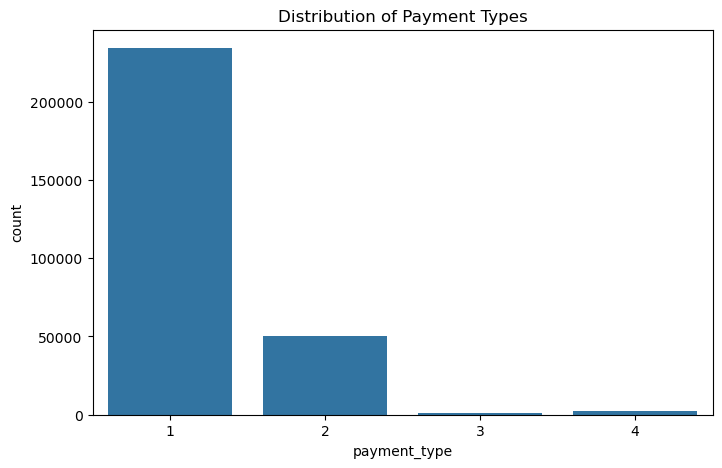

In [85]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize=(8,5))
sns.countplot(x='payment_type', data=df)
plt.title('Distribution of Payment Types')
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [87]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...  


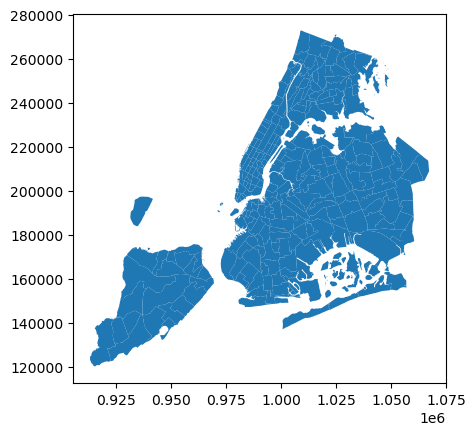

In [89]:
import geopandas as gpd

zones = gpd.read_file(r'C:\Users\Dell\Downloads\Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp')

print(zones.head())

zones.plot()
plt.show()

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

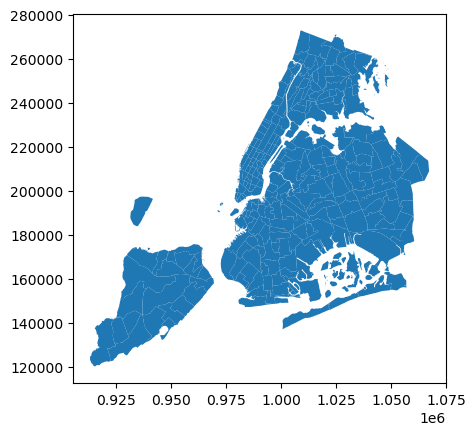

In [91]:
 print(zones.info())
 zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [93]:
# Merge zones and trip records using locationID and PULocationID
merged_df = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')
print(merged_df.head())


  tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  trip_distance  \
0  2023-04-21 01:37:42   2023-04-21 01:49:45              1.0           3.56   
1  2023-01-10 14:11:52   2023-01-10 14:21:05              1.0           0.90   
2  2023-02-04 15:03:50   2023-02-04 15:47:48              1.0          21.09   
3  2023-03-24 12:33:07   2023-03-24 12:59:15              2.0           2.57   
4  2023-09-05 17:03:28   2023-09-05 17:12:44              1.0           1.74   

   RatecodeID  PULocationID  DOLocationID  payment_type  fare_amount  extra  \
0         1.0            24           141             1         17.0    1.0   
1         1.0           186           170             2         10.0    0.0   
2         2.0           132           151             1         70.0    0.0   
3         1.0           186           239             1         23.3    0.0   
4         1.0           142           237             1         11.4    2.5   

   ...  pickup_month  quarter  trip_duration

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [95]:
# Group data by location and calculate the number of trips

trips_per_zone = merged_df.groupby('LocationID').size().reset_index(name='num_trips')
print(trips_per_zone.head())

   LocationID  num_trips
0         1.0         35
1         4.0        310
2         6.0          6
3         7.0        148
4         8.0          1


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [97]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(trips_per_zone, on='LocationID', how='left').fillna(0)
zones_with_trips.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  num_trips  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...       35.0  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...        0.0  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...        0.0  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...      310.0  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...        0.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

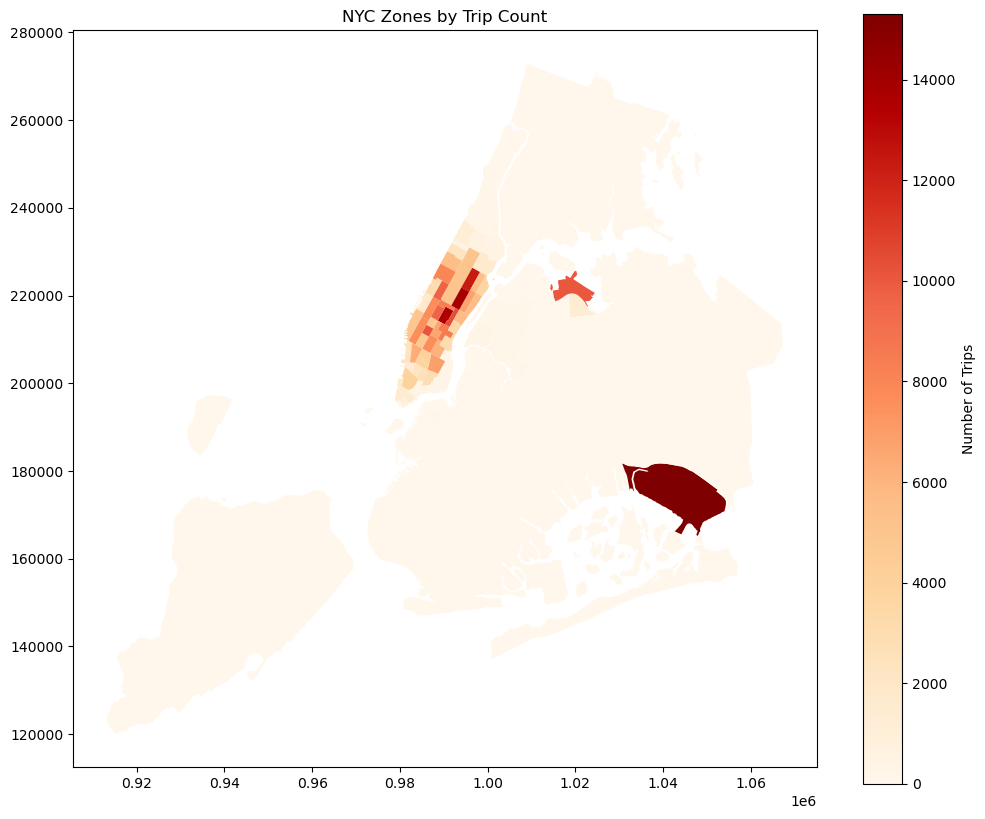

In [99]:
# Define figure and axis

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_with_trips.plot(
    column='num_trips',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"},
    cmap='OrRd'
)

plt.title('NYC Zones by Trip Count')
plt.show()



In [101]:
# can you try displaying the zones DF sorted by the number of trips?

print(zones_with_trips[['zone', 'num_trips']].sort_values(by='num_trips', ascending=False).head(10))

                             zone  num_trips
131                   JFK Airport    15311.0
236         Upper East Side South    13788.0
160                Midtown Center    13537.0
235         Upper East Side North    12298.0
161                  Midtown East    10413.0
185  Penn Station/Madison Sq West    10131.0
137             LaGuardia Airport    10075.0
141           Lincoln Square East     9632.0
229     Times Sq/Theatre District     9583.0
169                   Murray Hill     8513.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [121]:

zones_lookup = zones[['LocationID', 'zone']].drop_duplicates()

def identify_slow_routes(df, zones_lookup=None, min_trips=5, top_n=10):
   

    # Make sure datetimes are datetime type
    df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
    df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

    # Create trip duration in minutes
    df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

    # Filter valid trips and make a copy to avoid warnings
    df_valid = df[(df['trip_distance'] > 0) & (df['trip_duration'] > 0)].copy()

    # Add pickup hour
    df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

    # Group by PU, DO, hour
    grouped = df_valid.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg({
        'trip_distance': 'mean',
        'trip_duration': 'mean',
        'PULocationID': 'count'
    }).rename(columns={'PULocationID': 'num_trips'}).reset_index()

    # Compute speed
    grouped['speed_miles_per_min'] = grouped['trip_distance'] / grouped['trip_duration']
    grouped['speed_mph'] = grouped['speed_miles_per_min'] * 60

    # Keep groups with enough trips
    grouped = grouped[grouped['num_trips'] >= min_trips]

    # Slowest routes
    slowest = grouped.sort_values(by='speed_mph').head(top_n)

    # Merge with zone names if lookup is provided
    if zones_lookup is not None:
        slowest = slowest.merge(zones_lookup, left_on='PULocationID', right_on='LocationID')
        slowest = slowest.merge(zones_lookup, left_on='DOLocationID', right_on='LocationID',
                                suffixes=('_PU', '_DO'))

    return slowest


slow_routes = identify_slow_routes(df, zones_lookup=zones_lookup, min_trips=5, top_n=10)


print(slow_routes[['PULocationID', 'DOLocationID', 'pickup_hour', 
                   'trip_distance', 'trip_duration', 'speed_mph', 'num_trips']])


   PULocationID  DOLocationID  pickup_hour  trip_distance  trip_duration  \
0           114           113           11       0.710000     289.333333   
1           230           233           14       1.194000     302.700000   
2           100            68           15       1.043333     245.705556   
3           158           234            0       1.430000     286.663333   
4            68           186           20       0.852222     165.037037   
5           143            48           21       0.887778     164.051852   
6           186           164           12       0.659231     120.738462   
7           233           137           15       0.898889     162.766667   
8            88           231           17       1.210000     212.466667   
9           170           186            7       0.970000     163.181481   

   speed_mph  num_trips  
0   0.147235          5  
1   0.236670          5  
2   0.254776          6  
3   0.299306          5  
4   0.309829          9  
5   0.3

How does identifying high-traffic, high-demand routes help us?
Identifying these routes helps the company serve more trips, faster and smarter, while reducing costs and improving passenger satisfaction.

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

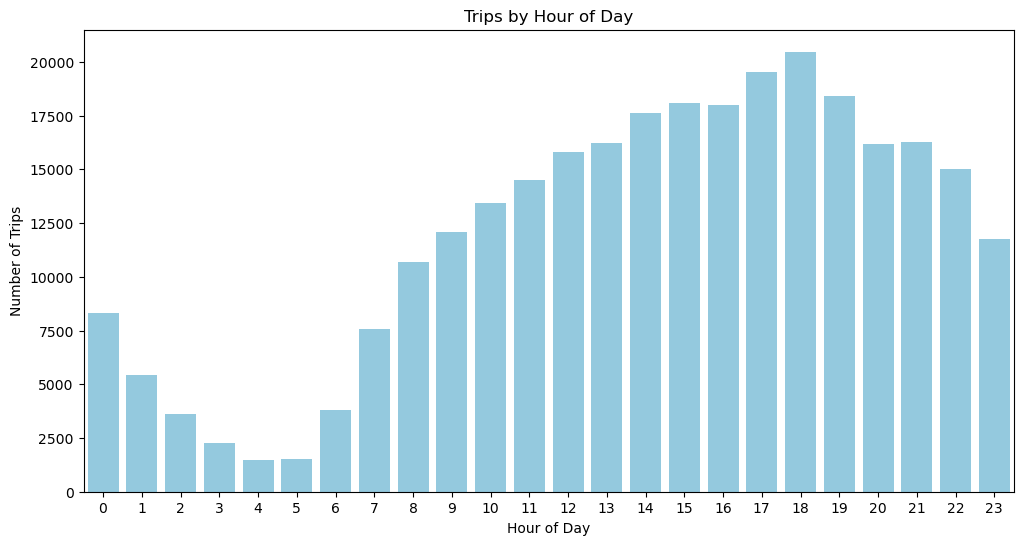

In [213]:
# Visualise the number of trips per hour and find the busiest hour


# Ensure datetime type
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')

# Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Visualise
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', data=df, color='skyblue')
plt.title('Trips by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.show()

#Find busiest hour
busiest_hour = df['pickup_hour'].value_counts().idxmax()
trip_count = df['pickup_hour'].value_counts().max()
#print(f"The busiest pickup hour is: {busiest_hour}:00 with {trip_count} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [127]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05 

# Count trips by hour
trips_per_hour = df['pickup_hour'].value_counts().sort_index()

# Scale up
estimated_trips_per_hour = trips_per_hour / sample_fraction

print("Estimated trips per hour (scaled up):")
print(estimated_trips_per_hour)

# Busiest hour
busiest_hour = trips_per_hour.idxmax()
busiest_hour_est = estimated_trips_per_hour.loc[busiest_hour]

print(f"Busiest hour in sample: {busiest_hour}:00")
print(f"Estimated real number of trips in that hour: {busiest_hour_est:.0f}")



Estimated trips per hour (scaled up):
pickup_hour
0     166620.0
1     108580.0
2      71960.0
3      45220.0
4      29400.0
5      30180.0
6      76280.0
7     151160.0
8     213740.0
9     241480.0
10    268360.0
11    290140.0
12    316340.0
13    324200.0
14    352040.0
15    361840.0
16    360040.0
17    391000.0
18    409460.0
19    368320.0
20    323460.0
21    325820.0
22    300020.0
23    234820.0
Name: count, dtype: float64
Busiest hour in sample: 18:00
Estimated real number of trips in that hour: 409460


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

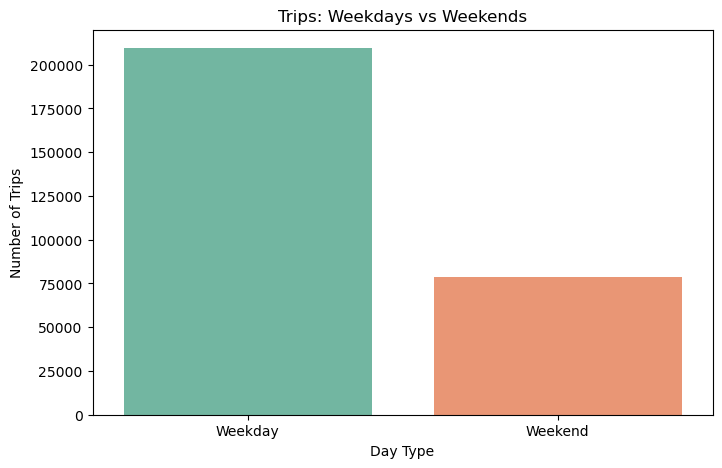

day_type
Weekday    209539
Weekend     78485
Name: count, dtype: int64


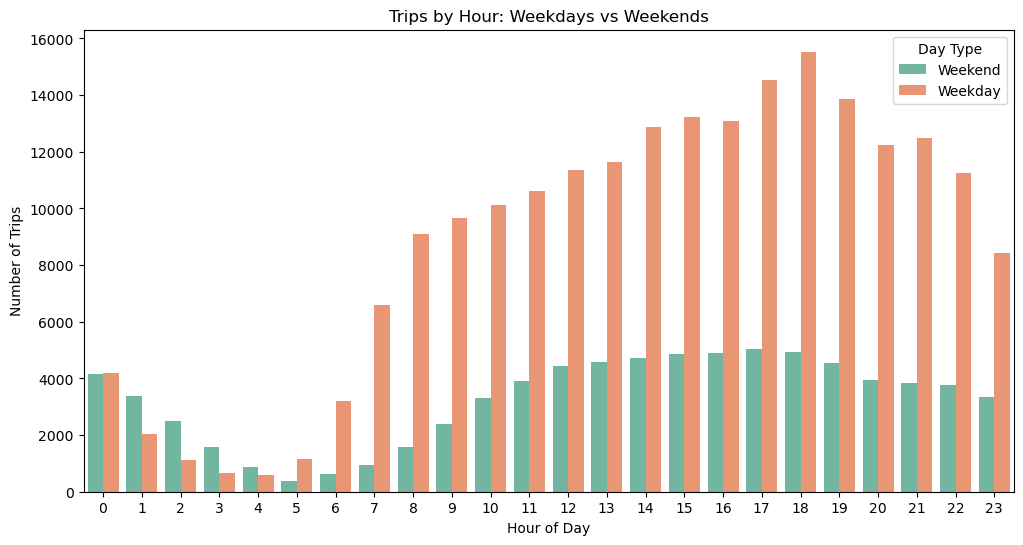

In [131]:
# Compare traffic trends for the week days and weekends


import seaborn as sns
import matplotlib.pyplot as plt

# Make sure datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()
df['day_type'] = df['pickup_day'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Overall counts (fixed)
plt.figure(figsize=(8, 5))
sns.countplot(x='day_type', hue='day_type', data=df, palette='Set2', legend=False)
plt.title('Trips: Weekdays vs Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Trips')
plt.show()

print(df['day_type'].value_counts())

# Hourly pattern stays same (this one is fine)
plt.figure(figsize=(12, 6))
sns.countplot(x='pickup_hour', hue='day_type', data=df, palette='Set2')
plt.title('Trips by Hour: Weekdays vs Weekends')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='Day Type')
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?
Finding busy and quiet hours lets taxi operators optimise shifts, routes, and pricing — to maximise profit and improve service.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [133]:
# Find top 10 pickup and dropoff zones

# ✅ Find top 10 pickup and dropoff zones

# Top 10 pickup
top_10_pu = df['PULocationID'].value_counts().head(10).reset_index()
top_10_pu.columns = ['PULocationID', 'num_trips']

# Top 10 dropoff
top_10_do = df['DOLocationID'].value_counts().head(10).reset_index()
top_10_do.columns = ['DOLocationID', 'num_trips']

print("Top 10 Pickup Zones:")
print(top_10_pu)

print("\nTop 10 Dropoff Zones:")
print(top_10_do)

# Merge with lookup for zone names
top_10_pu = top_10_pu.merge(zones_lookup, left_on='PULocationID', right_on='LocationID', how='left')
top_10_do = top_10_do.merge(zones_lookup, left_on='DOLocationID', right_on='LocationID', how='left')

print("\nTop 10 Pickup Zones with Names:")
print(top_10_pu[['PULocationID', 'zone', 'num_trips']])

print("\nTop 10 Dropoff Zones with Names:")
print(top_10_do[['DOLocationID', 'zone', 'num_trips']])


Top 10 Pickup Zones:
   PULocationID  num_trips
0           132      15311
1           237      13788
2           161      13537
3           236      12298
4           162      10413
5           186      10131
6           138      10075
7           142       9632
8           230       9583
9           170       8513

Top 10 Dropoff Zones:
   DOLocationID  num_trips
0           236      12846
1           237      12153
2           161      11192
3           230       9045
4           170       8492
5           162       8319
6           142       8151
7           239       7865
8           141       7733
9           163       7234

Top 10 Pickup Zones with Names:
   PULocationID                          zone  num_trips
0           132                   JFK Airport      15311
1           237         Upper East Side South      13788
2           161                Midtown Center      13537
3           236         Upper East Side North      12298
4           162                  Midtown Eas

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [135]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



# Count pickups and dropoffs
pickup_counts = df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'num_pickups']

dropoff_counts = df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'num_dropoffs']

# Merge
zone_counts = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)

# Ratio
zone_counts['pu_do_ratio'] = zone_counts['num_pickups'] / zone_counts['num_dropoffs'].replace(0, 1)

# Top & bottom 10
top10_ratio = zone_counts.sort_values(by='pu_do_ratio', ascending=False).head(10)
bottom10_ratio = zone_counts.sort_values(by='pu_do_ratio').head(10)

# Add names
top10_ratio = top10_ratio.merge(zones_lookup, on='LocationID', how='left')
bottom10_ratio = bottom10_ratio.merge(zones_lookup, on='LocationID', how='left')

print("Top 10 Pickup/Dropoff Ratios:")
print(top10_ratio[['LocationID', 'zone', 'num_pickups', 'num_dropoffs', 'pu_do_ratio']])

print("\nBottom 10 Pickup/Dropoff Ratios:")
print(bottom10_ratio[['LocationID', 'zone', 'num_pickups', 'num_dropoffs', 'pu_do_ratio']])


Top 10 Pickup/Dropoff Ratios:
   LocationID                          zone  num_pickups  num_dropoffs  \
0          70                 East Elmhurst       1322.0           147   
1         132                   JFK Airport      15311.0          3360   
2         138             LaGuardia Airport      10075.0          3456   
3          44        Charleston/Tottenville          2.0             1   
4         186  Penn Station/Madison Sq West      10131.0          6298   
5          43                  Central Park       4971.0          3515   
6         114       Greenwich Village South       3882.0          2771   
7         249                  West Village       6338.0          4955   
8         162                  Midtown East      10413.0          8319   
9         100              Garment District       4732.0          3909   

   pu_do_ratio  
0     8.993197  
1     4.556845  
2     2.915220  
3     2.000000  
4     1.608606  
5     1.414225  
6     1.400938  
7     1.279112  
8 

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [139]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Make sure datetime + hour
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Night filter
night_mask = (df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)
df_night = df[night_mask]

# Top 10 PU
night_pu = df_night['PULocationID'].value_counts().head(10).reset_index()
night_pu.columns = ['PULocationID', 'num_pickups']
night_pu = night_pu.merge(zones_lookup, left_on='PULocationID', right_on='LocationID', how='left')

print("Top 10 Pickup Zones during Night Hours between 11 PM to 5 AM:")
print(night_pu[['PULocationID', 'zone', 'num_pickups']])

# Top 10 DO
night_do = df_night['DOLocationID'].value_counts().head(10).reset_index()
night_do.columns = ['DOLocationID', 'num_dropoffs']
night_do = night_do.merge(zones_lookup, left_on='DOLocationID', right_on='LocationID', how='left')

print("\nTop 10 Dropoff Zones during Night Hours between 11 PM to 5 AM:")
print(night_do[['DOLocationID', 'zone', 'num_dropoffs']])



Top 10 Pickup Zones during Night Hours between 11 PM to 5 AM:
   PULocationID                          zone  num_pickups
0            79                  East Village         2426
1           132                   JFK Airport         2305
2           249                  West Village         1937
3            48                  Clinton East         1639
4           148               Lower East Side         1517
5           114       Greenwich Village South         1434
6           230     Times Sq/Theatre District         1301
7           186  Penn Station/Madison Sq West         1130
8            68                  East Chelsea          976
9           138             LaGuardia Airport          923

Top 10 Dropoff Zones during Night Hours between 11 PM to 5 AM:
   DOLocationID                       zone  num_dropoffs
0            79               East Village          1302
1            48               Clinton East          1086
2           170                Murray Hill           9

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [141]:
# Filter for night hours (11 PM to 5 AM)



# Make sure pickup datetime and hour
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

#  Filter for night hours (11 PM to 5 AM)
night_mask = (df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)

# Night trips
df_night = df[night_mask]

# Day trips
df_day = df[~night_mask]

#  Calculate total revenue for each (use fare_amount or total_amount as needed)
night_revenue = df_night['fare_amount'].sum()
day_revenue = df_day['fare_amount'].sum()
total_revenue = night_revenue + day_revenue

# Calculate share
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Night hours revenue share: {night_share:.2f}%")
print(f"Day hours revenue share: {day_share:.2f}%")


Night hours revenue share: 12.25%
Day hours revenue share: 87.75%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger for each Passenger Count:
   passenger_count  fare_per_mile_per_passenger
0              1.0                    10.815443
1              2.0                     6.981561
2              3.0                     4.434539
3              4.0                     3.789194
4              5.0                     1.768596
5              6.0                     1.321913


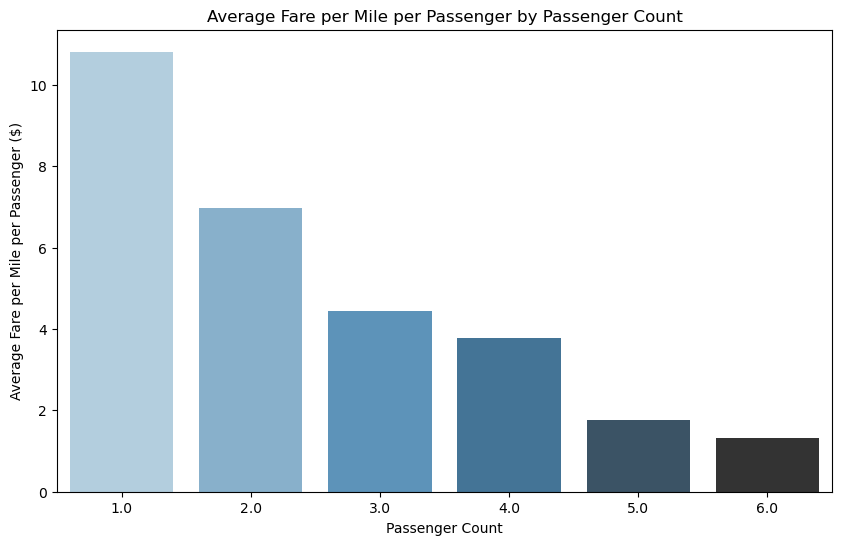

In [147]:
# Analyse the fare per mile per passenger for different passenger counts


# Make sure there are no zero distances or passenger counts
df_valid = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

#  Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

#  Calculate fare per mile per passenger
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_per_mile'] / df_valid['passenger_count']

#  Group by passenger count and find average
result = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print("Average Fare per Mile per Passenger for each Passenger Count:")
print(result)

#Create a Visualtisation for better analysis



plt.figure(figsize=(10, 6))
sns.barplot(
    x='passenger_count',
    y='fare_per_mile_per_passenger',
    hue='passenger_count', 
    data=result,
    palette='Blues_d',
    legend=False  
)
plt.title('Average Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Fare per Mile per Passenger ($)')
plt.show()




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average fare per mile by day:
  pickup_day  fare_per_mile
0     Monday      11.479789
1    Tuesday      10.558591
2  Wednesday      11.191390
3   Thursday      11.620414
4     Friday      11.005321
5   Saturday      10.705331
6     Sunday      13.763821

Average fare per mile by pickup hour:
    pickup_hour  fare_per_mile
0             0      12.713857
1             1      10.231308
2             2      10.791575
3             3       7.305415
4             4      20.224157
5             5      20.307766
6             6      10.654699
7             7       9.671092
8             8      11.468256
9             9      10.888613
10           10      10.330076
11           11      11.797277
12           12      12.246275
13           13      12.563060
14           14      12.418884
15           15      12.801780
16           16      14.030366
17           17      11.375769
18           18      11.734446
19           19      11.196308
20           20       9.306930
21           21       9.5

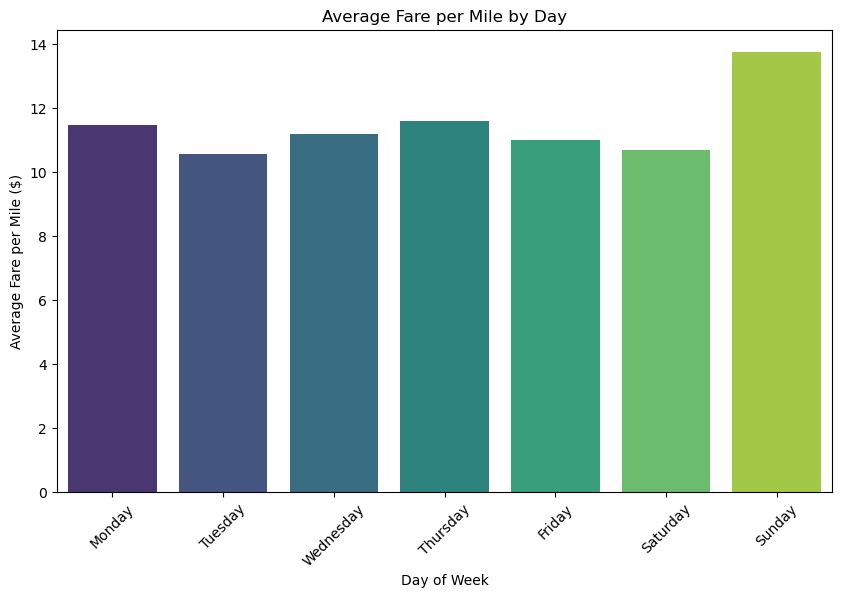

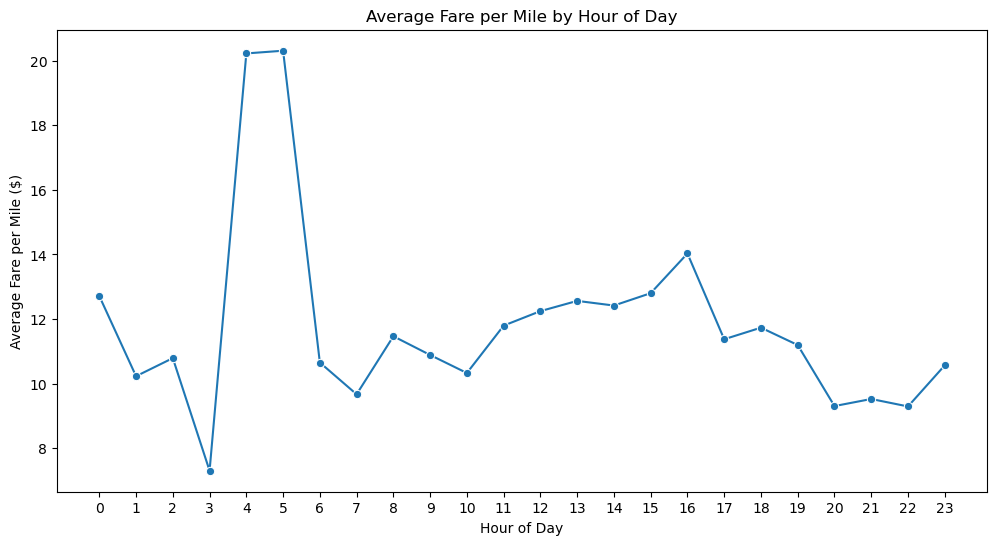

In [149]:
# Compare the average fare per mile for different days and for different times of the day




df_valid = df[df['trip_distance'] > 0].copy()

df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

#  Make sure datetime parts are available
df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'], errors='coerce')
df_valid['pickup_day'] = df_valid['tpep_pickup_datetime'].dt.day_name()
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

#  Compute average fare per mile by day of week
avg_fare_per_mile_day = (
    df_valid.groupby('pickup_day')['fare_per_mile']
    .mean()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index()
)

print("Average fare per mile by day:")
print(avg_fare_per_mile_day)

#  Compute average fare per mile by hour of day
avg_fare_per_mile_hour = (
    df_valid.groupby('pickup_hour')['fare_per_mile']
    .mean()
    .reset_index()
)

print("\nAverage fare per mile by pickup hour:")
print(avg_fare_per_mile_hour)

#Add Plots and bars
plt.figure(figsize=(10, 6))
sns.barplot(
    x='pickup_day',
    y='fare_per_mile',
    hue='pickup_day',
    data=avg_fare_per_mile_day,
    palette='viridis',
    legend=False
)
plt.title('Average Fare per Mile by Day')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(rotation=45)
plt.show()

#  Plot: Average fare per mile by hour
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='pickup_hour',
    y='fare_per_mile',
    data=avg_fare_per_mile_hour,
    marker='o'
)
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

Unique Vendor IDs: [2 1]
   VendorID  pickup_hour  fare_per_mile
0         1            0       7.136199
1         1            1       6.630251
2         1            2       7.199181
3         1            3       6.706135
4         1            4       7.033435


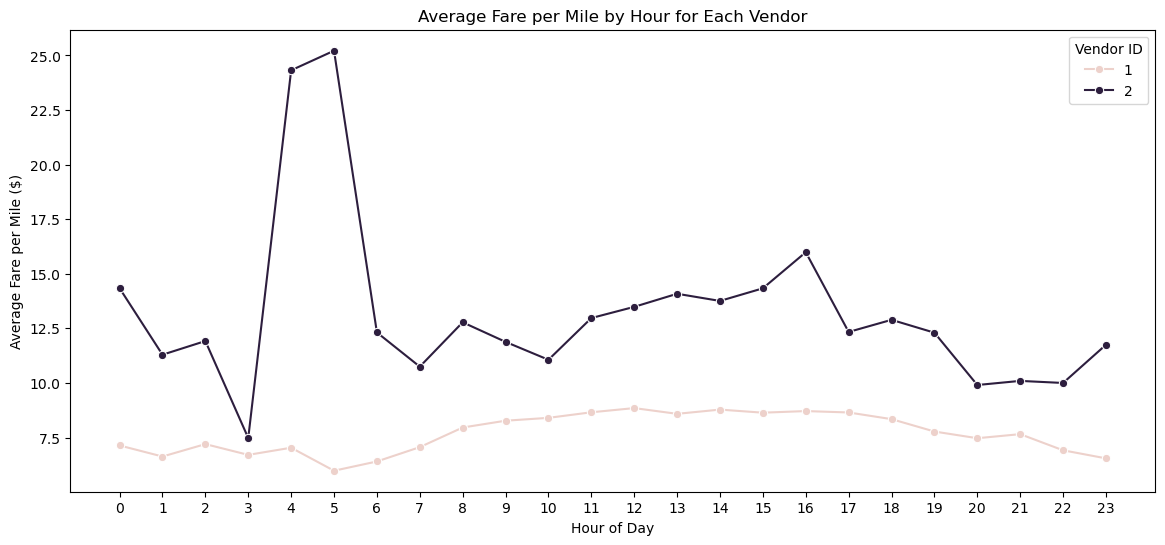

In [183]:
# Compare fare per mile for different vendors


unique_vendors = df['VendorID'].unique()
print("Unique Vendor IDs:", unique_vendors)

# Filter out zero distance
df_valid = df[df['trip_distance'] > 0].copy()
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Make sure datetime parts
df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'], errors='coerce')
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

# Group by VendorID and hour
vendor_hour_fare = (
    df_valid.groupby(['VendorID', 'pickup_hour'])['fare_per_mile']
    .mean()
    .reset_index()
)

print(vendor_hour_fare.head())

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=vendor_hour_fare,
    x='pickup_hour',
    y='fare_per_mile',
    hue='VendorID',
    marker='o'
)
plt.title('Average Fare per Mile by Hour for Each Vendor')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.xticks(range(0, 24))
plt.legend(title='Vendor ID')
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID distance_tier  fare_per_mile
0         1     <=2 miles       9.738991
1         1     2–5 miles       6.365747
2         1      >5 miles       4.459141
3         2     <=2 miles      18.276036
4         2     2–5 miles       6.550340
5         2      >5 miles       4.504085


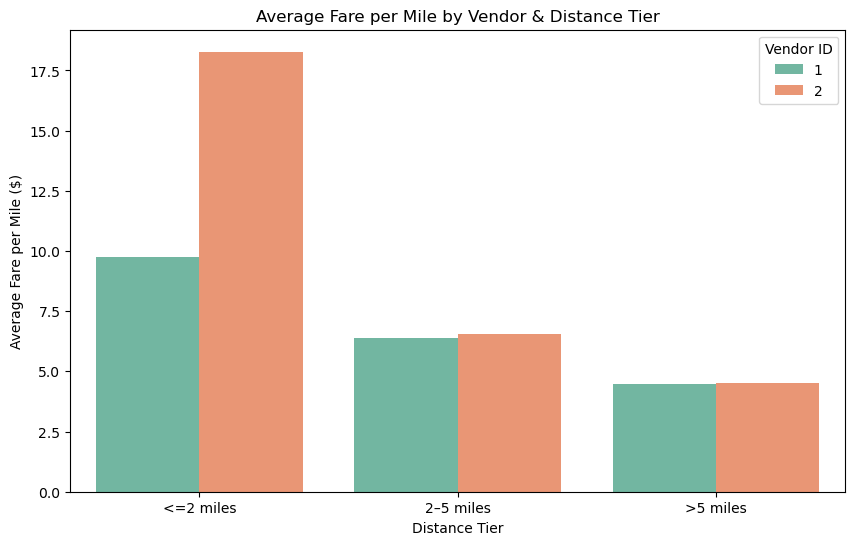

In [187]:
# Defining distance tiers



# Filter and compute fare per mile
df_valid = df[df['trip_distance'] > 0].copy()
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Define distance tiers
df_valid['distance_tier'] = pd.cut(
    df_valid['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['<=2 miles', '2–5 miles', '>5 miles'],
    right=True
)

# ✅ Group by vendor + tier, pass observed=True
tiered_vendor_fare = (
    df_valid.groupby(['VendorID', 'distance_tier'], observed=True)['fare_per_mile']
    .mean()
    .reset_index()
)

print(tiered_vendor_fare)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=tiered_vendor_fare,
    x='distance_tier',
    y='fare_per_mile',
    hue='VendorID',
    palette='Set2'
)
plt.title('Average Fare per Mile by Vendor & Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile ($)')
plt.legend(title='Vendor ID')
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Average Tip % by Distance Tier:
   distance_tier    tip_pct
0     <=2 miles  22.434917
1     2–5 miles  18.932817
2      >5 miles  16.747131

Average Tip % by Passenger Count:
    passenger_count    tip_pct
0              0.0  19.891057
1              1.0  25.971189
2              2.0  19.775613
3              3.0  19.066880
4              4.0  17.365965
5              5.0  20.613671
6              6.0  20.462723
7              8.0  18.292683

Average Tip % by Pickup Hour:
     pickup_hour    tip_pct
0             0  56.627810
1             1  21.078929
2             2  21.057804
3             3  20.358859
4             4  19.813020
5             5  18.084408
6             6  19.142729
7             7  19.845540
8             8  20.356700
9             9  20.046311
10           10  19.474438
11           11  19.267080
12           12  19.117659
13           13  24.715329
14           14  19.608199
15           15  57.849267
16           16  21.113044
17           17  21.804453
18      

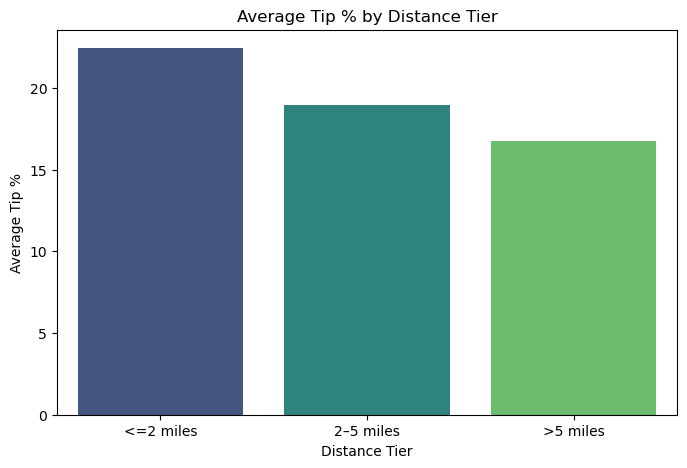

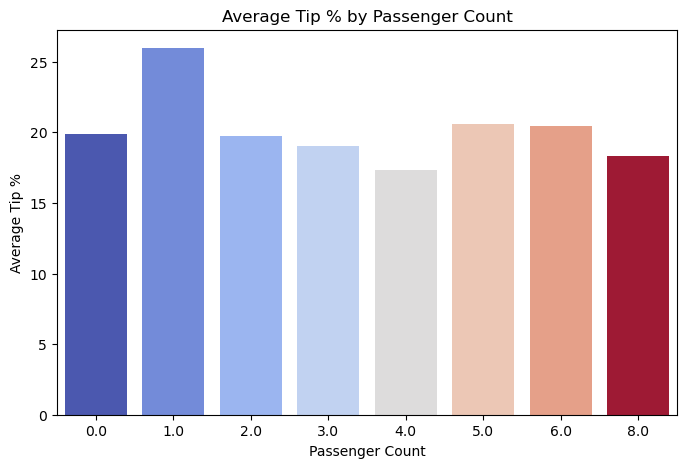

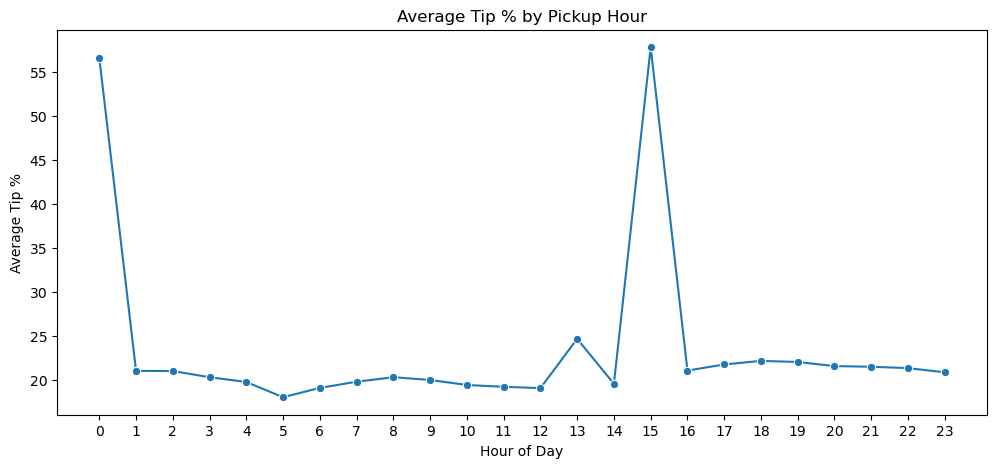

In [191]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



#  Keep only rows with positive fare
df_valid = df[df['fare_amount'] > 0].copy()

#  Calculate tip %
df_valid['tip_pct'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100

#  Make sure pickup datetime & hour
df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'], errors='coerce')
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

#  Define distance tiers
df_valid['distance_tier'] = pd.cut(
    df_valid['trip_distance'],
    bins=[0, 2, 5, float('inf')],
    labels=['<=2 miles', '2–5 miles', '>5 miles'],
    right=True
)

#  Group and calculate average tip %
tip_by_distance = (
    df_valid.groupby('distance_tier', observed=True)['tip_pct']
    .mean()
    .reset_index()
)

tip_by_passengers = (
    df_valid.groupby('passenger_count')['tip_pct']
    .mean()
    .reset_index()
)

tip_by_hour = (
    df_valid.groupby('pickup_hour')['tip_pct']
    .mean()
    .reset_index()
)

# Show results
print("Average Tip % by Distance Tier:\n", tip_by_distance)
print("\nAverage Tip % by Passenger Count:\n", tip_by_passengers)
print("\nAverage Tip % by Pickup Hour:\n", tip_by_hour)

#  Plot — Tip % by Distance Tier (fixed)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=tip_by_distance,
    x='distance_tier',
    y='tip_pct',
    hue='distance_tier',     
    palette='viridis',
    legend=False             
)
plt.title('Average Tip % by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Tip %')
plt.show()

# lot — Tip % by Passenger Count (fixed)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=tip_by_passengers,
    x='passenger_count',
    y='tip_pct',
    hue='passenger_count',  
    palette='coolwarm',
    legend=False
)
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip %')
plt.show()

#  Plot — Tip % by Pickup Hour (line plot is fine)
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=tip_by_hour,
    x='pickup_hour',
    y='tip_pct',
    marker='o'
)
plt.title('Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip %')
plt.xticks(range(0, 24))
plt.show()




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [193]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



# Make sure valid fares
df_valid = df[df['fare_amount'] > 0].copy()
df_valid['tip_pct'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100

# Make sure datetime parts
df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'], errors='coerce')
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

#  Define low-tip and high-tip groups
low_tip = df_valid[df_valid['tip_pct'] < 10].copy()
high_tip = df_valid[df_valid['tip_pct'] > 25].copy()

#  Compare key stats
comparison = pd.DataFrame({
    'Metric': ['Number of Trips',
               'Avg Fare Amount ($)',
               'Avg Tip Amount ($)',
               'Avg Tip %',
               'Avg Trip Distance (miles)',
               'Avg Passenger Count',
               'Avg Pickup Hour'],
    '<10% Tip': [
        len(low_tip),
        low_tip['fare_amount'].mean(),
        low_tip['tip_amount'].mean(),
        low_tip['tip_pct'].mean(),
        low_tip['trip_distance'].mean(),
        low_tip['passenger_count'].mean(),
        low_tip['pickup_hour'].mean()
    ],
    '>25% Tip': [
        len(high_tip),
        high_tip['fare_amount'].mean(),
        high_tip['tip_amount'].mean(),
        high_tip['tip_pct'].mean(),
        high_tip['trip_distance'].mean(),
        high_tip['passenger_count'].mean(),
        high_tip['pickup_hour'].mean()
    ]
})

print("\n Comparison: Trips with Tip % < 10% vs Tip % > 25%")
print(comparison)



 Comparison: Trips with Tip % < 10% vs Tip % > 25%
                      Metric      <10% Tip       >25% Tip
0            Number of Trips  75450.000000  129360.000000
1        Avg Fare Amount ($)     21.387942      14.389661
2         Avg Tip Amount ($)      0.269261       4.440431
3                  Avg Tip %      1.070136      40.998244
4  Avg Trip Distance (miles)      3.719492       2.282072
5        Avg Passenger Count      1.419457       1.346521
6            Avg Pickup Hour     13.962558      14.598763


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.


 Avg Passenger Count by Hour:
     pickup_hour  passenger_count
0             0         1.409315
1             1         1.428992
2             2         1.423847
3             3         1.448474
4             4         1.388435
5             5         1.282306
6             6         1.234338
7             7         1.260651
8             8         1.276972
9             9         1.294931
10           10         1.336041
11           11         1.357207
12           12         1.367516
13           13         1.366009
14           14         1.378707
15           15         1.403825
16           16         1.382013
17           17         1.376317
18           18         1.361110
19           19         1.388141
20           20         1.390898
21           21         1.426002
22           22         1.421305
23           23         1.415041

 Avg Passenger Count by Day:
   pickup_day  passenger_count
0     Monday         1.348979
1    Tuesday         1.312903
2  Wednesday         1

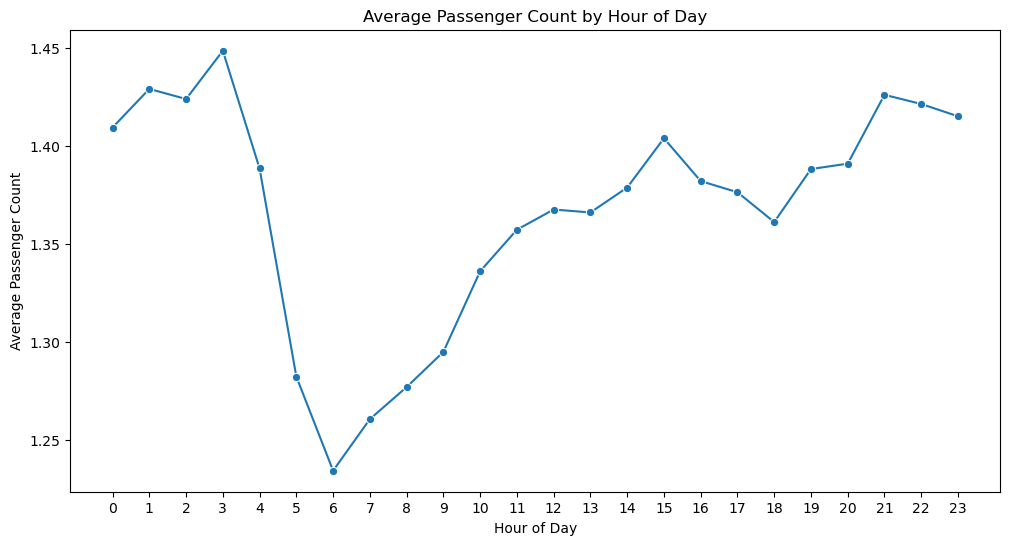

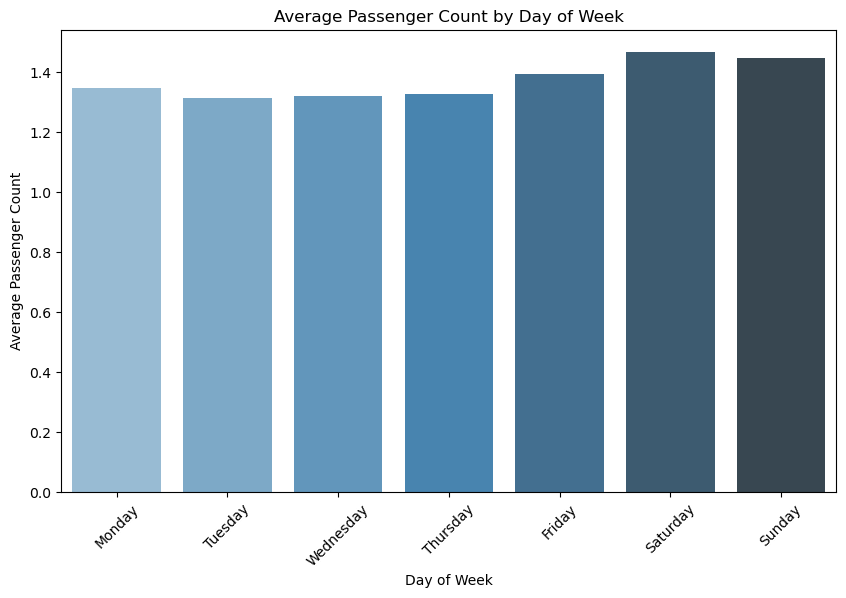

In [195]:
# See how passenger count varies across hours and days



#  Make sure datetime parts
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

#  Average passenger count by hour
passenger_by_hour = (
    df.groupby('pickup_hour')['passenger_count']
    .mean()
    .reset_index()
)

# Average passenger count by day
passenger_by_day = (
    df.groupby('pickup_day')['passenger_count']
    .mean()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    .reset_index()
)

print("\n Avg Passenger Count by Hour:\n", passenger_by_hour)
print("\n Avg Passenger Count by Day:\n", passenger_by_day)

# 4) Plot — Passenger Count by Hour
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=passenger_by_hour,
    x='pickup_hour',
    y='passenger_count',
    marker='o'
)
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(0, 24))
plt.show()

#  Plot — Passenger Count by Day
plt.figure(figsize=(10, 6))
sns.barplot(
    data=passenger_by_day,
    x='pickup_day',
    y='passenger_count',
    hue='pickup_day',
    palette='Blues_d',
    legend=False
)
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.xticks(rotation=45)
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones


Top 10 Zones by Avg Passenger Count:
     PULocationID                     zone  passenger_count
105           128         Inwood Hill Park         3.000000
127           150          Manhattan Beach         2.500000
101           123                Homecrest         2.500000
222           259       Woodlawn/Wakefield         2.500000
166           195                 Red Hook         2.060606
0               1           Newark Airport         2.028571
163           191           Queens Village         2.000000
25             34       Brooklyn Navy Yard         2.000000
2               6  Arrochar/Fort Wadsworth         2.000000
56             67            Dyker Heights         2.000000


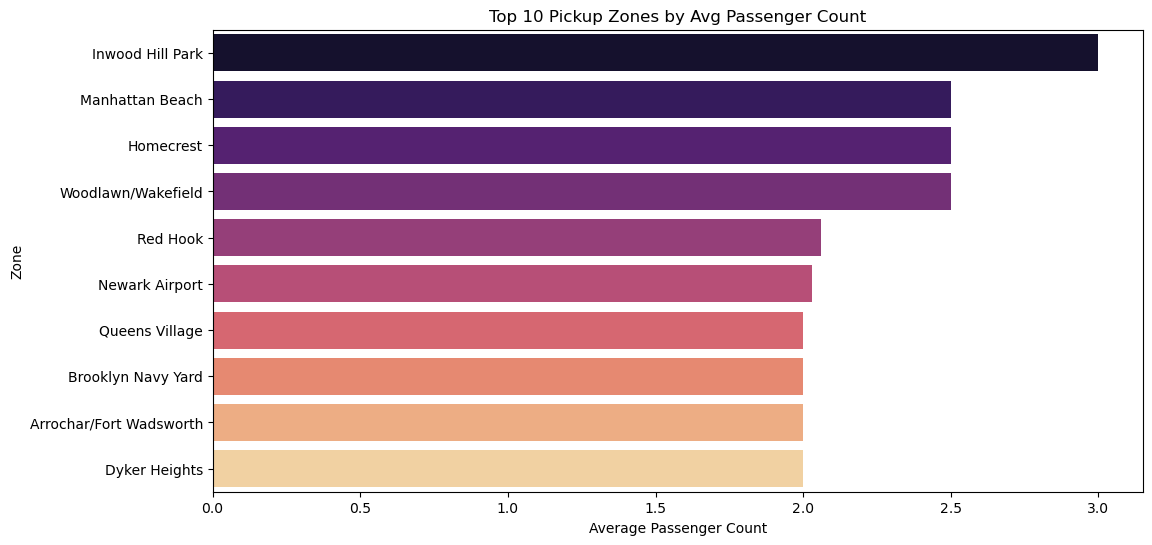

In [217]:
# Group by PU zone and get average passenger count
passenger_by_zone = (
    df.groupby('PULocationID')['passenger_count']
    .mean()
    .reset_index()
)

# Join with zone names
passenger_by_zone = passenger_by_zone.merge(
    zones_lookup,
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

# Sort by average passenger count
passenger_by_zone = passenger_by_zone.sort_values(by='passenger_count', ascending=False)

print("\nTop 10 Zones by Avg Passenger Count:")
print(passenger_by_zone[['PULocationID', 'zone', 'passenger_count']].head(10))

# Plot top 10 zones
top10 = passenger_by_zone.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    y='zone',
    x='passenger_count',
    hue='zone',         # ✅ Use the same column as hue
    palette='magma',
    dodge=False,        # ✅ Bars stay stacked, not grouped
    legend=False        # ✅ Turn off the legend if not needed
)
plt.title('Top 10 Pickup Zones by Avg Passenger Count')
plt.xlabel('Average Passenger Count')
plt.ylabel('Zone')
plt.show()




 Avg passenger count by PU zone:
   PULocationID  avg_passenger_count
0             1             2.028571
1             4             1.461290
2             6             2.000000
3             7             1.385135
4             8             1.000000

 zones_with_trips with avg passenger count:
   OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1

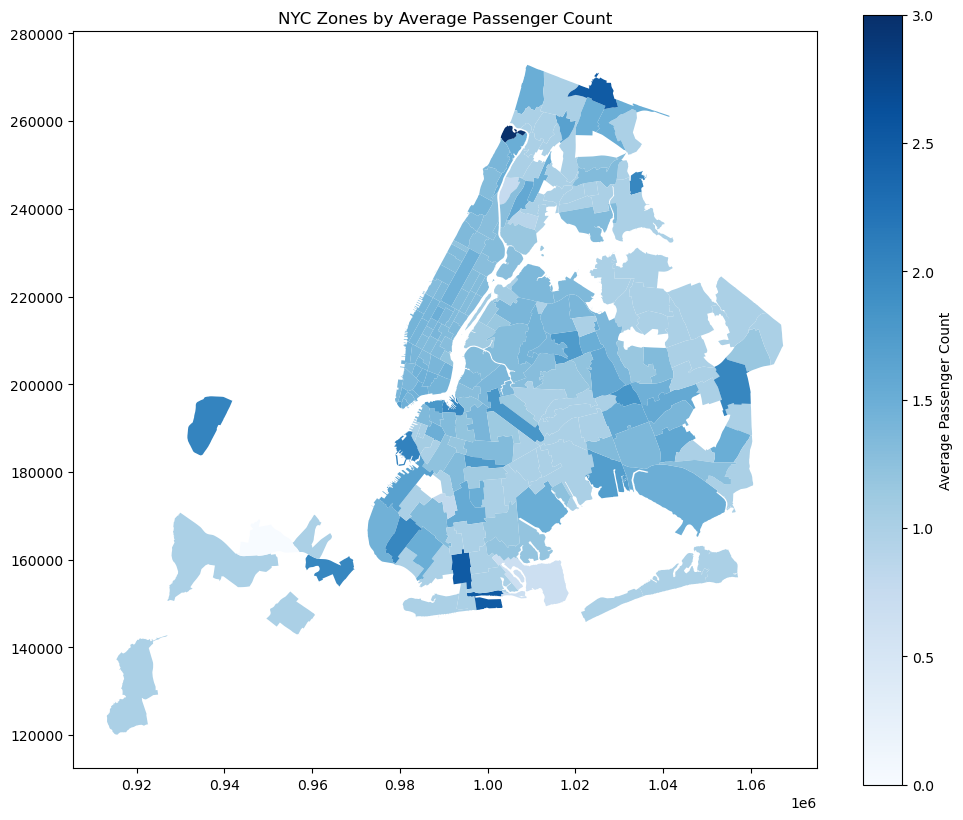

In [199]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



# Compute average passenger count per pickup zone
avg_passenger_by_zone = (
    df.groupby('PULocationID')['passenger_count']
    .mean()
    .reset_index()
    .rename(columns={'passenger_count': 'avg_passenger_count'})
)

print("\n Avg passenger count by PU zone:")
print(avg_passenger_by_zone.head())

#  Merge into zones_with_trips GeoDataFrame
zones_with_trips = zones_with_trips.merge(
    avg_passenger_by_zone,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)

print("\n zones_with_trips with avg passenger count:")
print(zones_with_trips.head())

#  Plot the zones colored by avg passenger count
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

zones_with_trips.plot(
    column='avg_passenger_count',
    ax=ax,
    legend=True,
    legend_kwds={'label': "Average Passenger Count", 'orientation': "vertical"},
    cmap='Blues'
)

plt.title('NYC Zones by Average Passenger Count')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently


 How often is each surcharge applied (overall):
                       Applied    Percent
extra                   179231  62.227584
mta_tax                 285337  99.066748
improvement_surcharge   287927  99.965975
congestion_surcharge    267388  92.834997
airport_fee               2008   0.697162


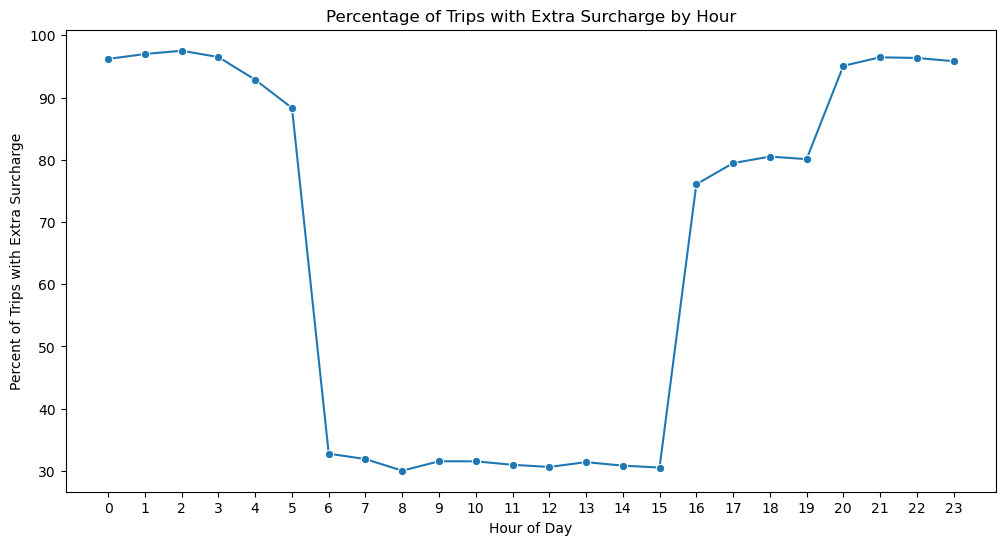

In [201]:
# How often is each surcharge applied?

df_valid = df.copy()

# Make flags: is each surcharge applied?
df_valid['extra_applied'] = df_valid['extra'] > 0
df_valid['mta_tax_applied'] = df_valid['mta_tax'] > 0
df_valid['improvement_applied'] = df_valid['improvement_surcharge'] > 0
df_valid['congestion_applied'] = df_valid['congestion_surcharge'] > 0
df_valid['airport_fee_applied'] = df_valid['airport_fee'] > 0

#  How often is each surcharge applied overall
surcharge_counts = pd.DataFrame({
    'Applied': [
        df_valid['extra_applied'].sum(),
        df_valid['mta_tax_applied'].sum(),
        df_valid['improvement_applied'].sum(),
        df_valid['congestion_applied'].sum(),
        df_valid['airport_fee_applied'].sum()
    ]
}, index=['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee'])

surcharge_counts['Percent'] = 100 * surcharge_counts['Applied'] / len(df_valid)

print("\n How often is each surcharge applied (overall):")
print(surcharge_counts)

#  Analyse extra surcharge by pickup hour
df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'], errors='coerce')
df_valid['pickup_hour'] = df_valid['tpep_pickup_datetime'].dt.hour

extra_by_hour = (
    df_valid.groupby('pickup_hour')['extra_applied']
    .mean()
    .reset_index()
)
extra_by_hour['extra_applied'] *= 100

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=extra_by_hour,
    x='pickup_hour',
    y='extra_applied',
    marker='o'
)
plt.title('Percentage of Trips with Extra Surcharge by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Percent of Trips with Extra Surcharge')
plt.xticks(range(0, 24))
plt.show()


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
#Explained in detail in report document
Smart routing and dispatching based on peak times, zones, and traffic patterns can help reduce passenger wait times, avoid bottlenecks, and keep operations efficient.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
#Explained in detail in report document
Using zone patterns plus time trends ensures cabs are always near where people need rides most, improving service and reducing empty miles.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
#Explained in detail in report document
A flexible, data-backed pricing plan balances competitive rates    with peak-hour surcharges, distance incentives, and off-peak discounts — boosting revenue while keeping customers happy.